# Run Keras Locally

# Load MobileNet Model

In [12]:
# https://keras.io/applications/#mobilenet
from keras.applications.mobilenet import MobileNet

# 100% size: 224x224 image
model = MobileNet(weights = './keras_data/mobilenet_1_0_224_tf.h5',
                 include_top = True,
                 alpha = 1.0)


# Examine Model Stages

In [13]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

# Load Image To Run Prediction On

<class 'PIL.Image.Image'>
None
RGB
(224, 224)


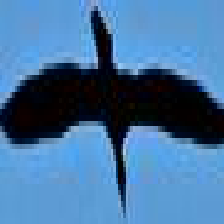

In [14]:
from keras.preprocessing.image import load_img

img = load_img('./keras_data/Goose_f7fe3c8c98e5770d_190299.jpeg', target_size = (224,224))
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

img

# Format Image For Model Engine

In [15]:
from keras.preprocessing.image import img_to_array

# Get pixels as array
image = img_to_array(img)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

In [16]:
from keras.applications.mobilenet import preprocess_input

# This balances colors and other things depending on model
image = preprocess_input(image)

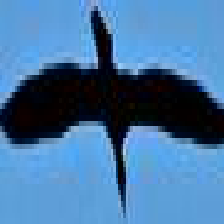

In [17]:
from keras.preprocessing.image import array_to_img
array_to_img(image[0])

# Run the Prediction

In [18]:
yhat = model.predict(image)

### Pretty anti-climatic

# Extract Prediction From Model Output

In [19]:
from keras.applications.mobilenet import decode_predictions

label = decode_predictions(yhat)

# Just grab the first, most likely prediction
label = label[0][0]
print(f"{label[1]} ({label[2]})")

black_stork (0.899718165397644)


## Google Bird Labels
Magpie
Woodpecker
Blue jay
Ostrich
Penguin
Raven
Chicken
Eagle
Owl
Duck
Canary
Goose
Swan
Falcon
Parrot
Sparrow
Turkey

## similar resnet labels
magpie
jay
ostrich
king_penguin
bald_eagle
great_grey_owl
goose
black_swan

## Label Matching
Magpie = magpie
Blue jay = jay
Ostrich = ostrich
Penguin = king_penguin
Eagle = bald_eagle
Owl = great_grey_owl
Goose = goose
Swan = black_swan


## Perfect Match
Magpie = magpie
Ostrich = ostrich
Goose = goose